In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np
import re

In [3]:
df_original = pd.read_csv('reddit_opinion_republican.csv')



In [4]:
df_original.shape

(262811, 24)

In [5]:
df_original.isna().sum()

comment_id                         0
score                              0
self_text                          2
subreddit                          0
created_time                       0
post_id                            0
author_name                        0
controversiality                   0
ups                                0
downs                              0
user_is_verified                4992
user_account_created_time       4992
user_awardee_karma                 9
user_awarder_karma                 9
user_link_karma                    9
user_comment_karma                 9
user_total_karma                   9
post_score                         0
post_self_text                212453
post_title                         0
post_upvote_ratio                  0
post_thumbs_ups                    0
post_total_awards_received         0
post_created_time                  0
dtype: int64

In [6]:
df_original.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified               object
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

In [7]:
df_original['self_text'] = df_original['self_text'].astype(str)

# Aplica la función re.sub para eliminar caracteres no deseados
df_original['self_text'] = df_original['self_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x)).apply(lambda x: re.sub(r'\n', ' ', x))



In [8]:
# creamos un dataframe con solo columna de texto, posteriormente le agregaremos una columna de sentimiento
df_sentiment = pd.DataFrame()
df_sentiment['comentario'] = df_original['self_text'].str.strip().str.lower() # No hay espacios en blanco antes o despues del texto
df_sentiment

,comentario
0,over a million died from covid in the us and n...
1,what made the 1973 oil crisis so bad then
2,you are white rich and connected enough to con...
3,he would be devastated if he could read
4,no kidding the sane americans all know this al...
...,...
262806,good bot
262807,the top level post has been removed
262808,delete
262809,third way had an article on all the times we ...


In [8]:
df_sentiment['comentario'].unique()

array(['over a million died from covid in the us and no one gave a shit',
       'what made the 1973 oil crisis so bad then',
       'you are white rich and connected enough to convince yourself that theyll never come for me  sprinkle in a little bit of internalized homophobia and you got someone who is at least willing to throw their rights under the bus for low taxes and gas prices',
       ..., 'delete',
       'third way had an article  on all the times we went with  tariffsprotectionism and it never worked    haikubot',
       'third way had an article on all the times we went with tariffsprotectionism and it never worked'],
      dtype=object)

Instalar dependencias

pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118^C

In [9]:
df_sentiment.isna().sum()

comentario    0
dtype: int64

Instanciar dependencias

In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Instanciar el modelo

In [11]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model =  AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


# Encode and Calculate Sentiment

In [12]:
tokens = tokenizer.encode('I hated this, absolutely the worst', return_tensors='pt')
#tokens

tensor([[  101,   151, 39487, 10163, 10372,   117, 35925, 10563, 10103, 43060,
           102]])

In [13]:
#tokenizer.decode(tokens[0])

'[CLS] i hated this, absolutely the worst [SEP]'

In [15]:
result =model(tokens)

In [17]:
result.logits # podemos ver el tensor completo

tensor([[ 4.8750,  1.7880, -0.8356, -3.0027, -2.0727]],
       grad_fn=<AddmmBackward0>)

In [16]:
#result ## probability of that particular class of being the sentiment (0 position = really bad sentiment)

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.8750,  1.7880, -0.8356, -3.0027, -2.0727]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [19]:
int(torch.argmax(result.logits))

0

# SCORE

In [14]:
df_sentiment['comentario'].iloc[0]

'over a million died from covid in the us and no one gave a shit'

In [12]:
def sent_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result =model(tokens)
    return int(torch.argmax(result.logits))+1

In [16]:
sent_score(df_sentiment['comentario'].iloc[0])

1

In [12]:
# Partir el DataFrame en partes
num_partes = 100
partes = [df_sentiment.iloc[i:i + len(df_sentiment) // num_partes] for i in range(0, len(df_sentiment), len(df_sentiment) // num_partes)]

In [13]:
import time

In [14]:
df_sentiment.isna().sum()

comentario    0
dtype: int64

In [16]:
df_sentiment['sentiment'] = df_sentiment['comentario'].apply(lambda x: sent_score(x[:512]))

In [19]:
df_procesado = pd.concat(partes, ignore_index=True)

In [26]:
df_sentiment[df_sentiment['comentario'] == 'this is from the new gemini in bard']

,comentario,sentiment


In [34]:
df_sentiment.dropna

<bound method DataFrame.dropna of                                                comentario  sentiment
0       over a million died from covid in the us and n...          1
1               what made the 1973 oil crisis so bad then          1
2       you are white rich and connected enough to con...          2
3                 he would be devastated if he could read          2
4       no kidding the sane americans all know this al...          5
...                                                   ...        ...
262806                                           good bot          4
262807                the top level post has been removed          1
262808                                             delete          1
262809  third way had an article  on all the times we ...          1
262810  third way had an article on all the times we w...          1

[262811 rows x 2 columns]>

In [28]:
df_procesado.loc[262808]

comentario    delete
sentiment          1
Name: 262808, dtype: object

In [35]:
df_sentiment.to_csv('comentarios_etiquetados.csv')

In [38]:
df_mejor = pd.read_csv('comentarios_etiquetados3.csv', nrows=10000)

In [39]:
df_mejor

,Unnamed: 0,comentario,sentiment
0,0,over a million died from covid in the us and n...,1.0
1,1,what made the 1973 oil crisis so bad then,1.0
2,2,you are white rich and connected enough to con...,2.0
3,3,he would be devastated if he could read,2.0
4,4,no kidding the sane americans all know this al...,5.0
...,...,...,...
9995,1178,this is from the new gemini in bard,NaN
9996,1178,this is from the new gemini in bard,NaN
9997,1178,this is from the new gemini in bard,NaN
9998,1178,this is from the new gemini in bard,NaN


In [1]:
import pandas as pd
file_path = 'comentarios_etiquetados12.csv'
df_etiquetados = pd.read_csv(file_path)

In [2]:
df_etiquetados.isna().sum()

comentario    235
sentiment     429
dtype: int64

In [2]:
df_etiquetados = df_etiquetados.dropna()

In [3]:
df_etiquetados['polaridad'] =  df_etiquetados['sentiment'].apply(lambda rating: 'pos' if rating >3 else'neg')

In [4]:
df_etiquetados['polaridad'].head()


0    neg
1    neg
2    neg
3    neg
4    pos
Name: polaridad, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(df_etiquetados,test_size = 0.20)
print('El tamaño de los datos de entrenamiento es de :', train_data.shape)
print('El tamaño de los datos de prueba es de :', test_data.shape)

El tamaño de los datos de entrenamiento es de : (209974, 3)
El tamaño de los datos de prueba es de : (52494, 3)


In [7]:
import gc
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer()
# Conversion a vectores numericos
train_matrix = vectorizer.transform(train_data['comentario'].values.astype('U'))
test_matrix = vectorizer.transform(test_data['comentario'].values.astype('U'))

gc.collect()

1090

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=60, random_state=42)
rf = clf.fit(train_matrix,train_data['polaridad'])

In [17]:
y_pred = rf.predict(test_matrix)
from sklearn.metrics import f1_score
f1_score(y_pred,test_data.polaridad)

0.38969809322033905

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_data.polaridad,y_pred)

print(cm)

[[40333   510]
 [ 8708  2943]]


Text(50.722222222222214, 0.5, 'Truth')

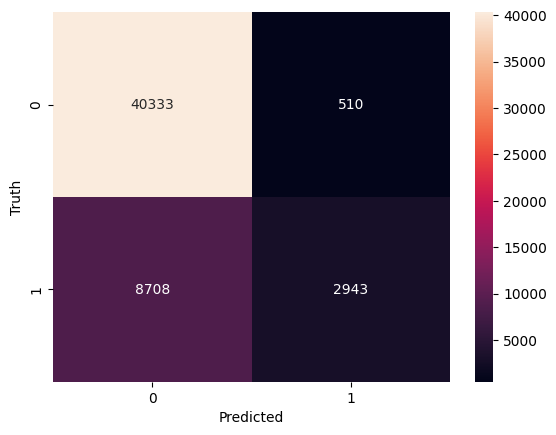

In [11]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')	

In [14]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score

In [6]:
df_etiquetados.columns

Index(['comentario', 'sentiment', 'polaridad'], dtype='object')

Aqui el codigo de SVM

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(df_etiquetados,test_size = 0.20)
print('El tamaño de los datos de entrenamiento es de :', train_data.shape)
print('El tamaño de los datos de prueba es de :', test_data.shape)

El tamaño de los datos de entrenamiento es de : (209974, 3)
El tamaño de los datos de prueba es de : (52494, 3)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train_data['comentario'])
test_vectors = vectorizer.transform(test_data['comentario'])

In [8]:
df_etiquetados.columns

Index(['comentario', 'sentiment', 'polaridad'], dtype='object')

In [9]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train_data['polaridad'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test_data['polaridad'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Training time: 6450.950170s; Prediction time: 576.376781s
positive:  {'precision': 0.7367615158861809, 'recall': 0.4969446596092607, 'f1-score': 0.5935444078947368, 'support': 11619.0}
negative:  {'precision': 0.8691134648543342, 'recall': 0.9495290519877676, 'f1-score': 0.9075433755787308, 'support': 40875.0}
